In [1]:
from Binaries import *

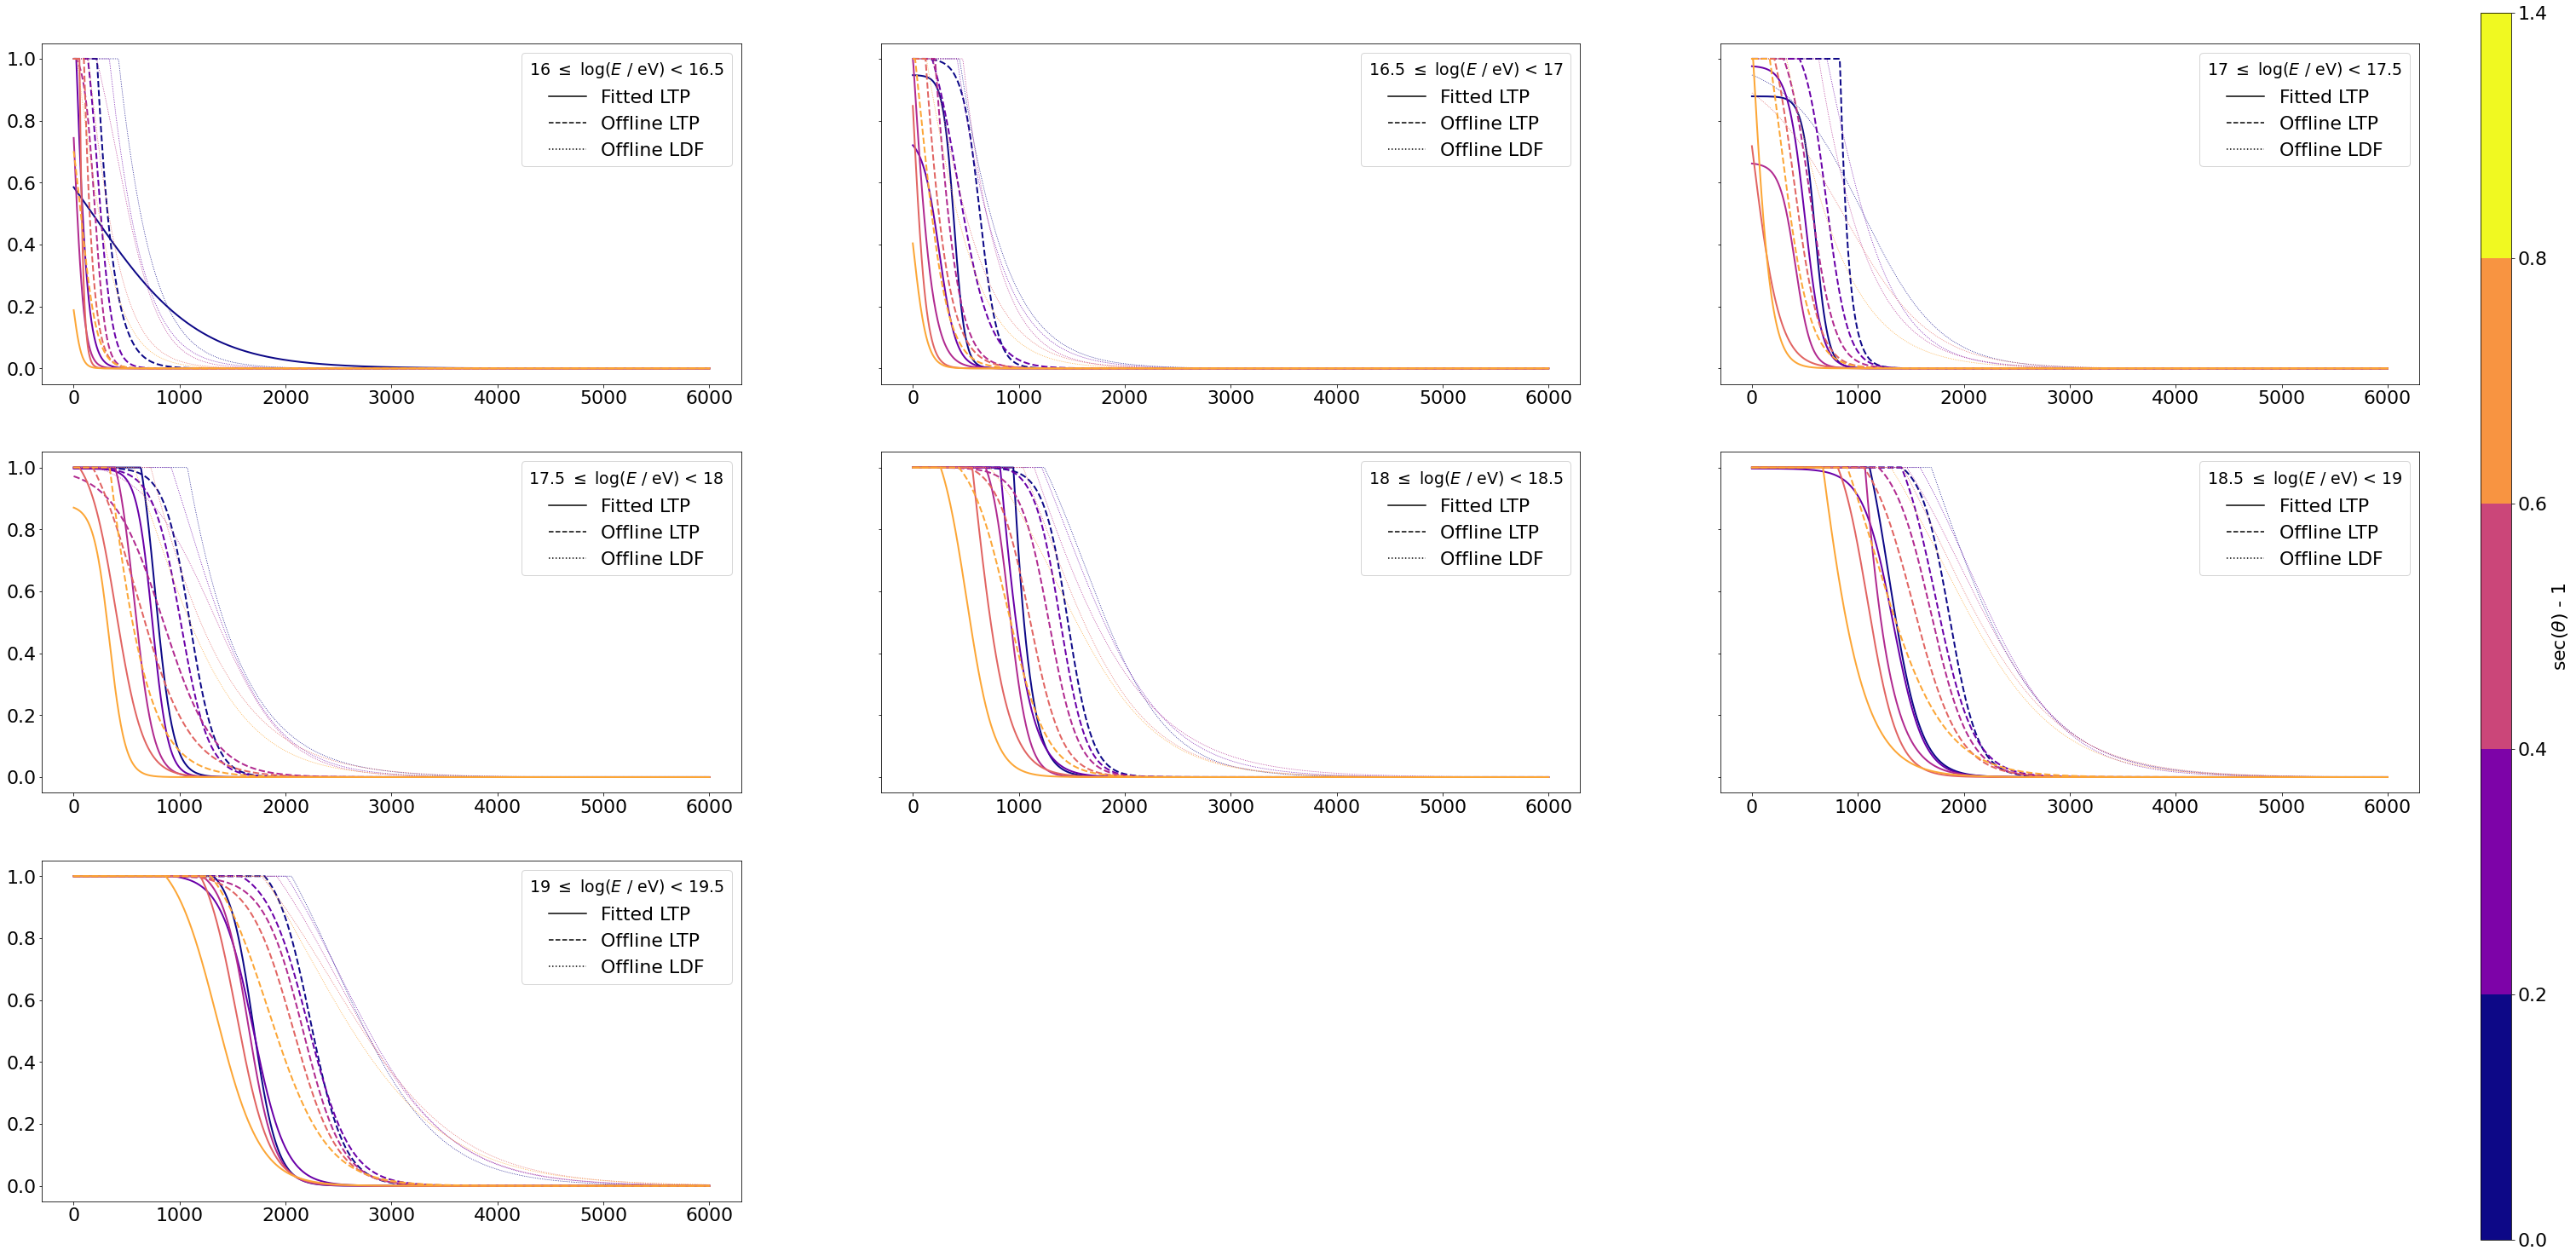

In [3]:
fig, axes = plt.subplots(3,3, sharex = False, sharey = True, figsize = [50, 25])
axes[-1][-1].axis("off"), axes[-1][-2].axis("off")

e_labels = [r"$16$", r"$16.5$", r"$17$", r"$17.5$", r"$18$", r"$18.5$", r"$19$", r"$19.5$"]            
annotate = lambda e : e_labels[e] + r" $\leq$ log($E$ / eV) < " + e_labels[e + 1]
theta_bins =  [0.0000, 33.5600, 44.4200, 51.3200, 56.2500, 65.3700]

colormap = cmap.get_cmap("plasma")

for e in range(len(e_labels) - 1):

    ax = axes[e // 3][e % 3]

    ax.plot([], [], color = "k", ls = "solid", label = "Fitted LTP")
    ax.plot([], [], color = "k", ls = "--", label = "Offline LTP")
    ax.plot([], [], color = "k", ls = ":", label = "Offline LDF")

    ax.legend(title = annotate(e), title_fontsize = 19)

    for t in range(len(theta_bins) - 1):

        c = colormap(t / (len(theta_bins) - 1))
        fitfunc_Offline_LDF, _ = get_fit_function("/cr/tempdata01/filip/QGSJET-II/LDF/", e, t)
        fitfunc_Offline_LTP, _ = get_fit_function("/cr/tempdata01/filip/QGSJET-II/LTP/", e, t)
        fitfunc_Own_LTP, _     = get_fit_function("/cr/data01/filip/models/HardwareClassifier/ROC_curve/full_random_traces_downsampled_vem_1.000/", e, t)

        X = np.linspace(0, 6000, 1000)

        ax.plot(X, fitfunc_Offline_LDF(X), color = c, ls = ":", lw = 0.8)
        ax.plot(X, fitfunc_Offline_LTP(X), color = c, ls = "--", lw = 2)
        ax.plot(X, fitfunc_Own_LTP(X), color = c, ls = "solid", lw = 2)

norm = BoundaryNorm(theta_bins, colormap.N)
ax2 = fig.add_axes([0.92, 0.1, 0.01, 0.8])
cbar = ColorbarBase(ax2, cmap=colormap, norm=norm, label = r"sec$(\theta)$ - 1")
cbar.set_ticks(theta_bins)
cbar.set_ticklabels(["0.0", "0.2", "0.4", "0.6", "0.8", "1.4"])

# plt.subplots_adjust(hspace = 0.04, wspace = 0)


IndexError: list index out of range

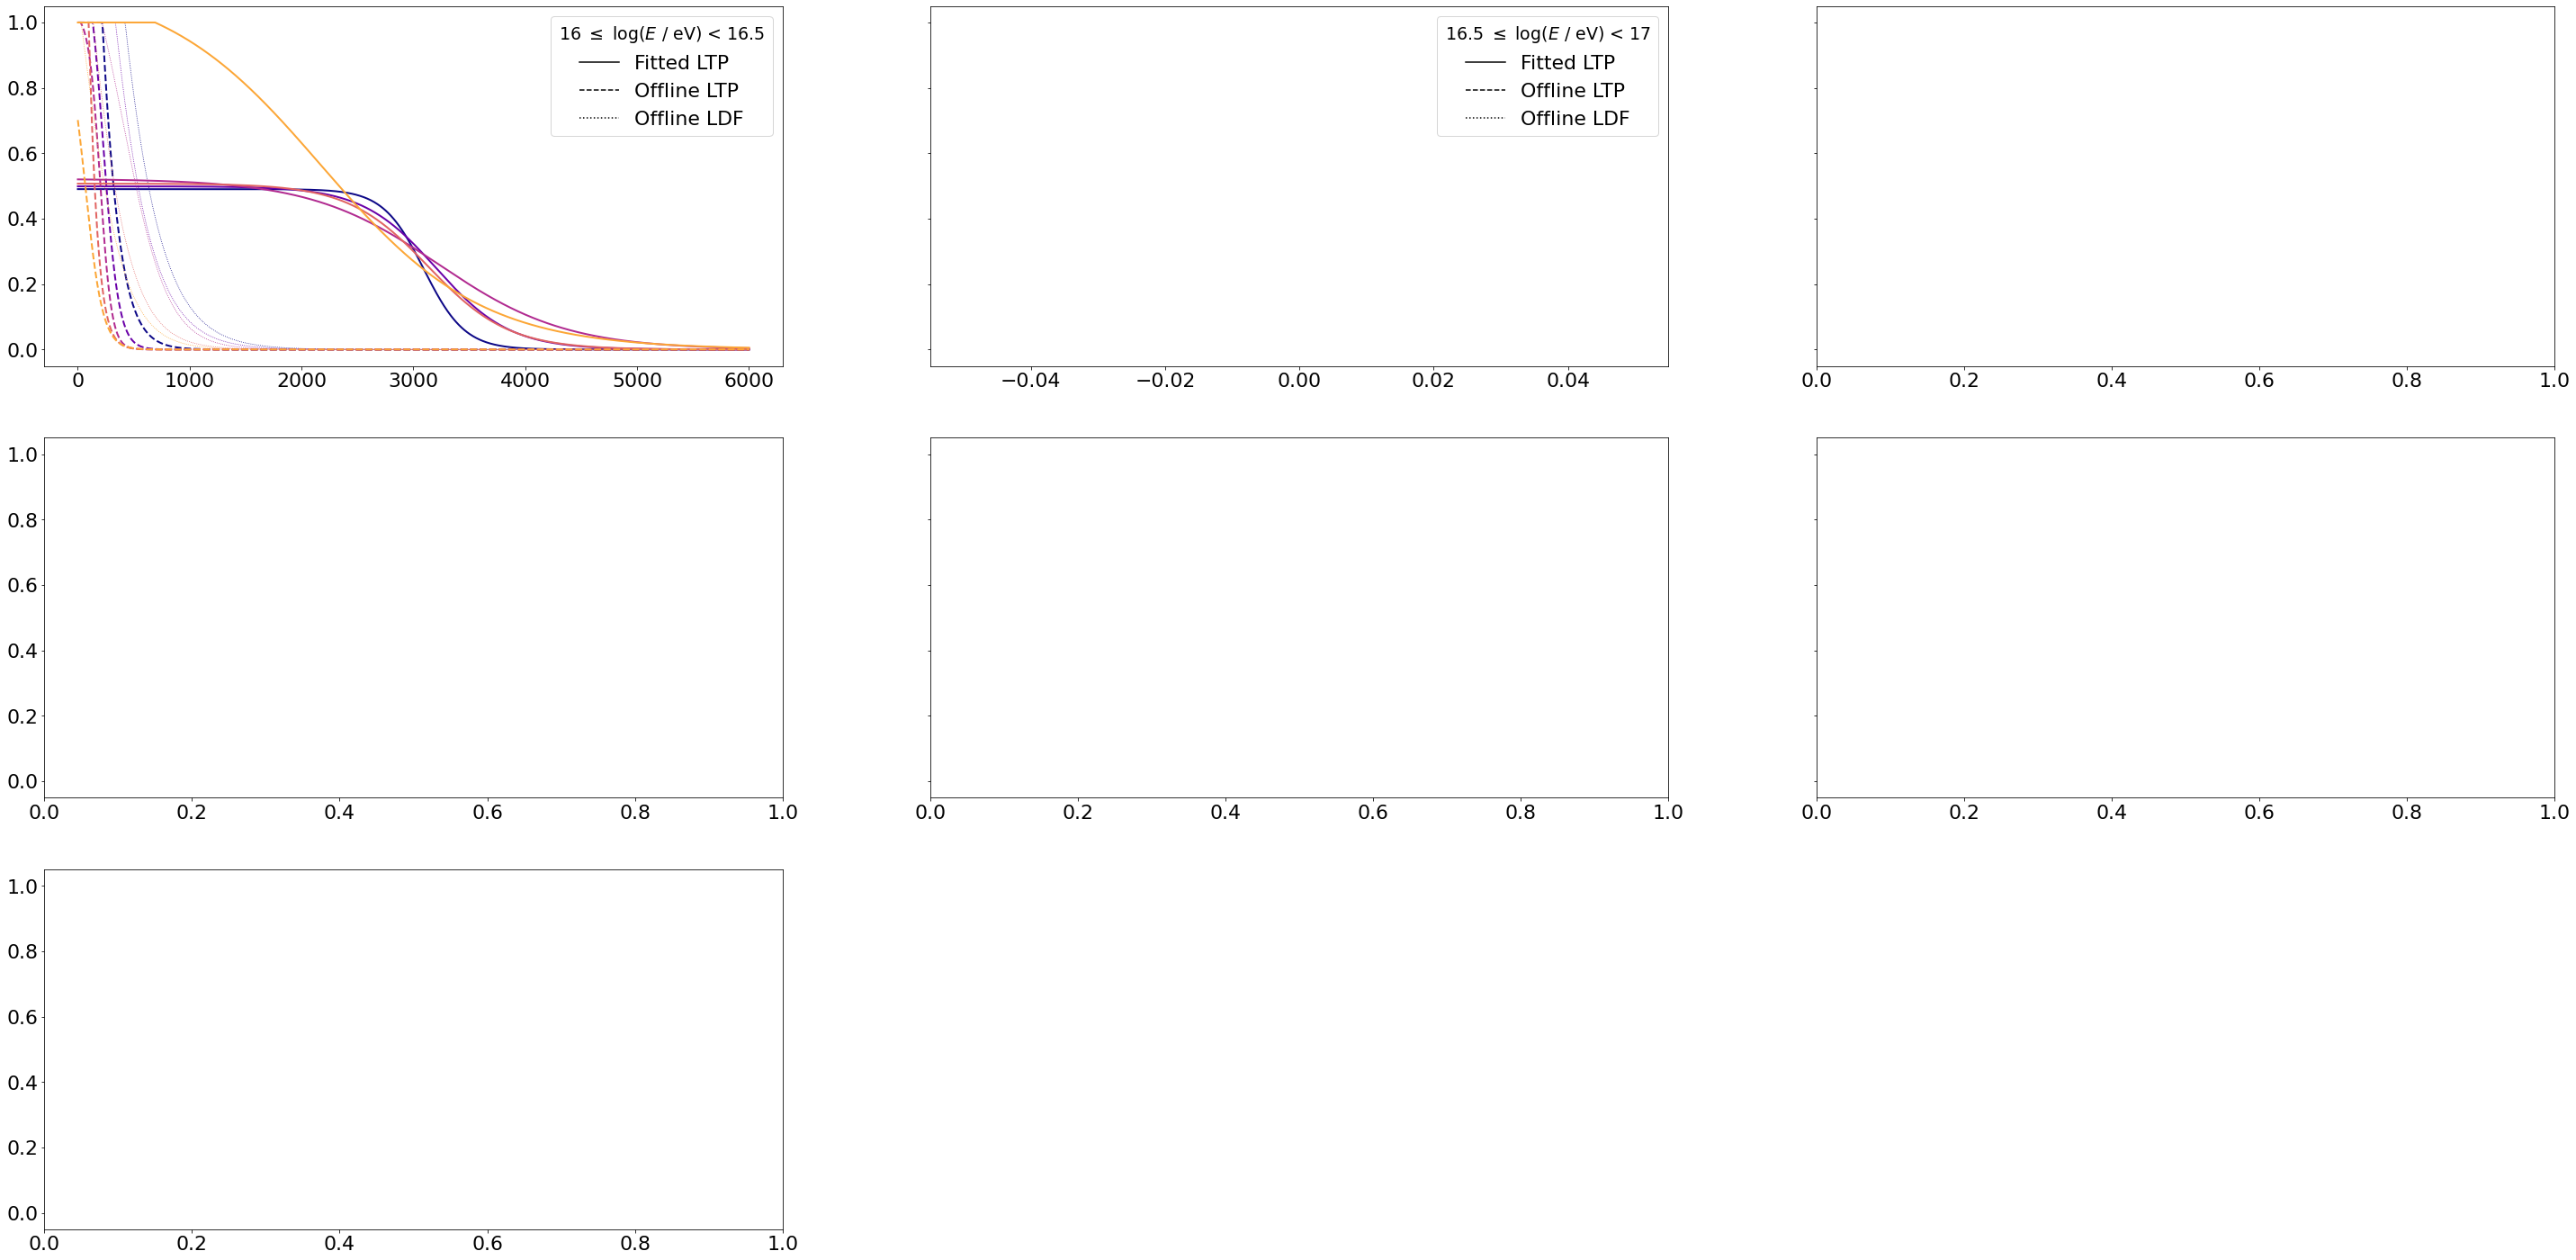

In [4]:
fig, axes = plt.subplots(3,3, sharex = False, sharey = True, figsize = [50, 25])
axes[-1][-1].axis("off"), axes[-1][-2].axis("off")

e_labels = [r"$16$", r"$16.5$", r"$17$", r"$17.5$", r"$18$", r"$18.5$", r"$19$", r"$19.5$"]            
annotate = lambda e : e_labels[e] + r" $\leq$ log($E$ / eV) < " + e_labels[e + 1]
theta_bins =  [0.0000, 33.5600, 44.4200, 51.3200, 56.2500, 65.3700]

colormap = cmap.get_cmap("plasma")

for e in range(len(e_labels) - 1):

    ax = axes[e // 3][e % 3]

    ax.plot([], [], color = "k", ls = "solid", label = "Fitted LTP")
    ax.plot([], [], color = "k", ls = "--", label = "Offline LTP")
    ax.plot([], [], color = "k", ls = ":", label = "Offline LDF")

    ax.legend(title = annotate(e), title_fontsize = 19)

    for t in range(len(theta_bins) - 1):

        c = colormap(t / (len(theta_bins) - 1))
        fitfunc_Offline_LDF, _ = get_fit_function("/cr/tempdata01/filip/QGSJET-II/LDF/", e, t)
        fitfunc_Offline_LTP, _ = get_fit_function("/cr/tempdata01/filip/QGSJET-II/LTP/", e, t)
        fitfunc_Own_LTP, _     = get_fit_function("/cr/data01/filip/models/HardwareClassifier/ROC_curve/VEM_TRACES/", e, t)

        X = np.linspace(0, 6000, 1000)

        ax.plot(X, fitfunc_Offline_LDF(X), color = c, ls = ":", lw = 0.8)
        ax.plot(X, fitfunc_Offline_LTP(X), color = c, ls = "--", lw = 2)
        ax.plot(X, fitfunc_Own_LTP(X), color = c, ls = "solid", lw = 2)

norm = BoundaryNorm(theta_bins, colormap.N)
ax2 = fig.add_axes([0.92, 0.1, 0.01, 0.8])
cbar = ColorbarBase(ax2, cmap=colormap, norm=norm, label = r"sec$(\theta)$ - 1")
cbar.set_ticks(theta_bins)
cbar.set_ticklabels(["0.0", "0.2", "0.4", "0.6", "0.8", "1.4"])


Classifier                                    Dataset                                  TP      FP      TN      FN
HardwareClassifier                            VEM_TRACES                           172542       0       0  148595 -> ACC =  53.73%


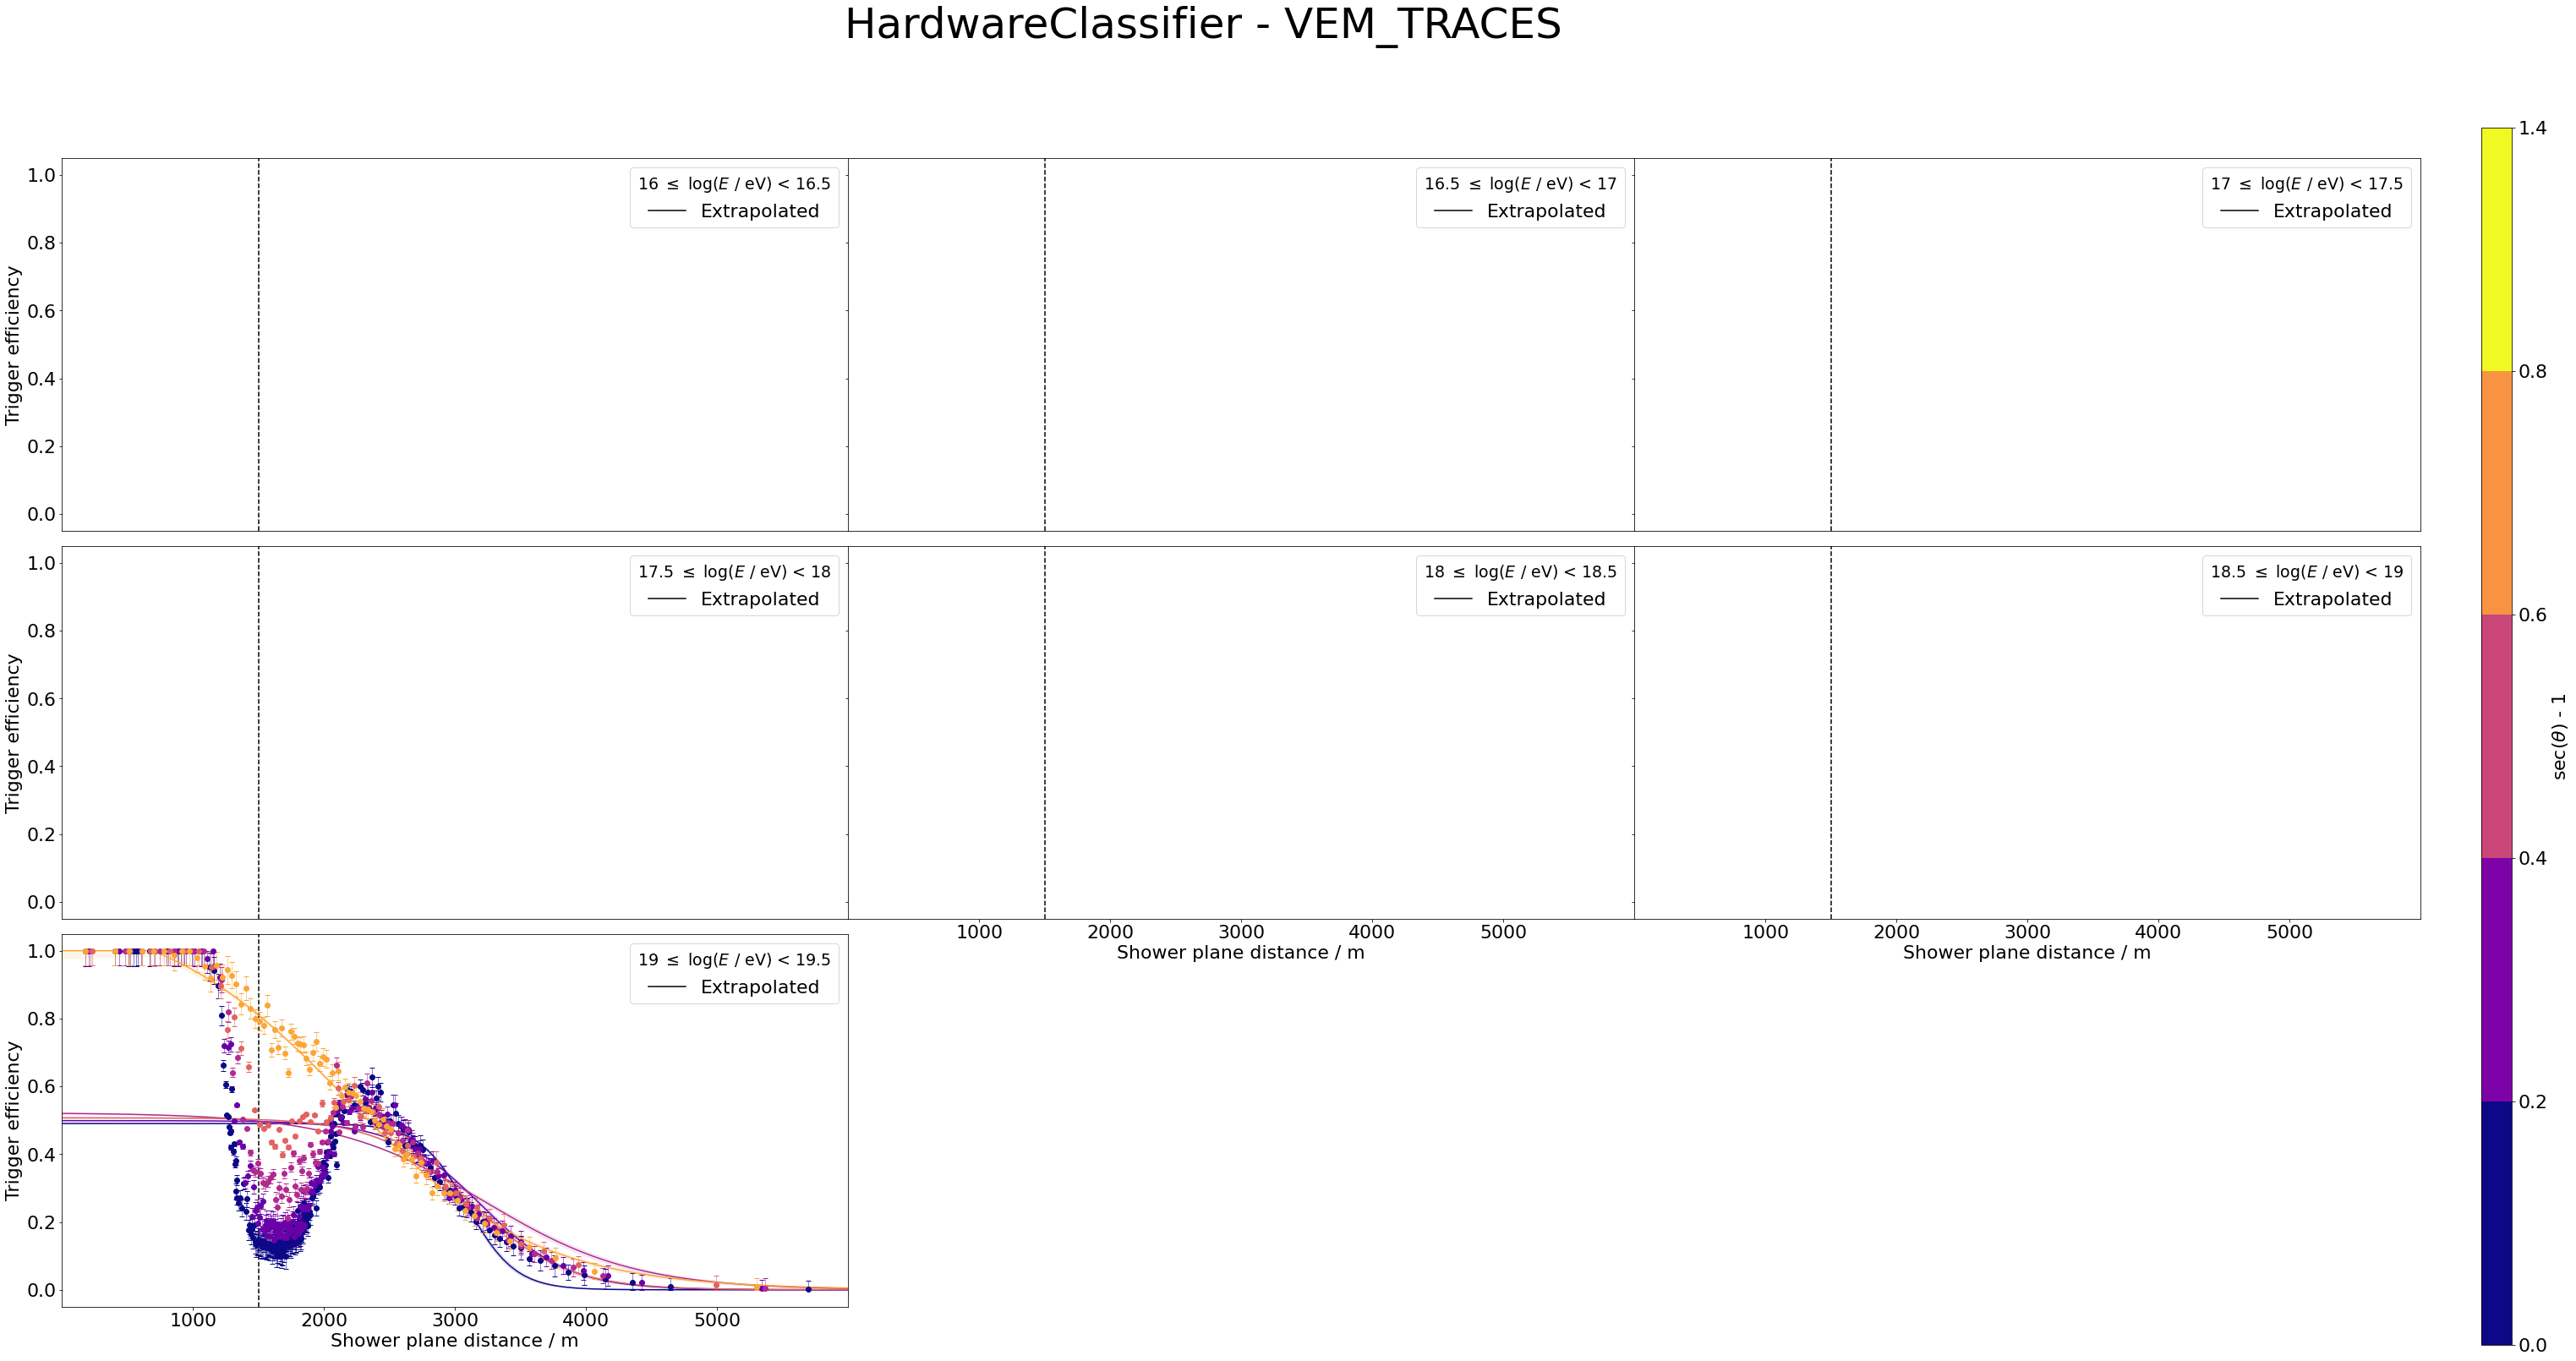

In [2]:
HardwareClassifier = HardwareClassifier()
HardwareClassifier.spd_energy_efficiency("VEM_TRACES")

In [9]:
EventsVEM = EventGenerator(["19_19.5"], real_background = False, split = 1, q_peak = [1, 1, 1])
VEM_files_dir = "/cr/tempdata01/filip/QGSJET-II/COMPARE/VEM/"
EventsVEM.files = [VEM_files_dir + file for file in os.listdir(VEM_files_dir)]

In [12]:
desired_file = "DAT100397_00.csv"

for j, file in enumerate(EventsVEM.files):
    if desired_file in file: break

traces = EventsVEM.__getitem__(j)

for trace in traces:
    print(trace)

||                      S=================S                           || 2.9935e+19 eV @ 553 m from core   
||                      S=======S                                     || 2.9935e+19 eV @ 957 m from core   
||                      S===========S                                 || 2.9935e+19 eV @ 1147 m from core   
||                      S====================S                        || 2.9935e+19 eV @ 1482 m from core   
||                      S===============S                             || 2.9935e+19 eV @ 1672 m from core   
||                      S=========S                                   || 2.9935e+19 eV @ 1999 m from core   
||                      S====S                                        || 2.9935e+19 eV @ 2032 m from core   
||                      S=S                                           || 2.9935e+19 eV @ 2610 m from core   
||                      S=S                                           || 2.9935e+19 eV @ 2211 m from core   
||                   